# Medical Cost Personal Insurance
## C Soma Sekhar
## Batch: DS2307

In [5]:
# import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Dataset
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorial columns: sex, smoker, region 
Charges column is the target 

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# ↑ 
###  No missing/null values in Dataset

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


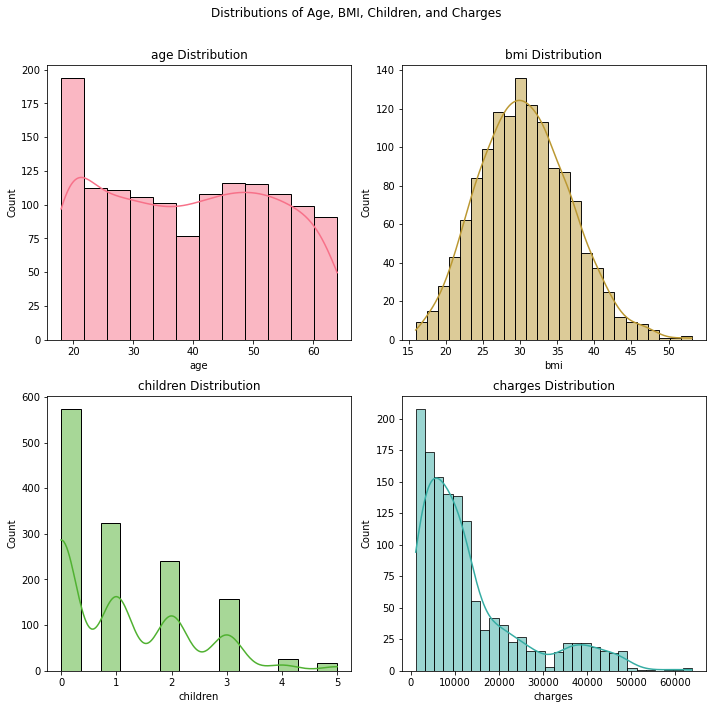

In [11]:
# Set a custom color palette
sns.set_palette("husl")

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Distributions of Age, BMI, Children, and Charges')

# Loop through and create subplots
numerical_features = ['age', 'bmi', 'children', 'charges']
for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2  # Determine subplot row and column
    sns.histplot(df[feature], kde=True, ax=axes[row, col], color=sns.color_palette()[i])
    axes[row, col].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add some space for the title
plt.show()

### underweight : <=18.5 Normal :18.5 to 24.9 overweight: 25.0 to 29.9 obese: 30.0 or higher

* From BMI plot we can see that most people are obese

* There are more people with 0 Children

* Most of charges are around 10000

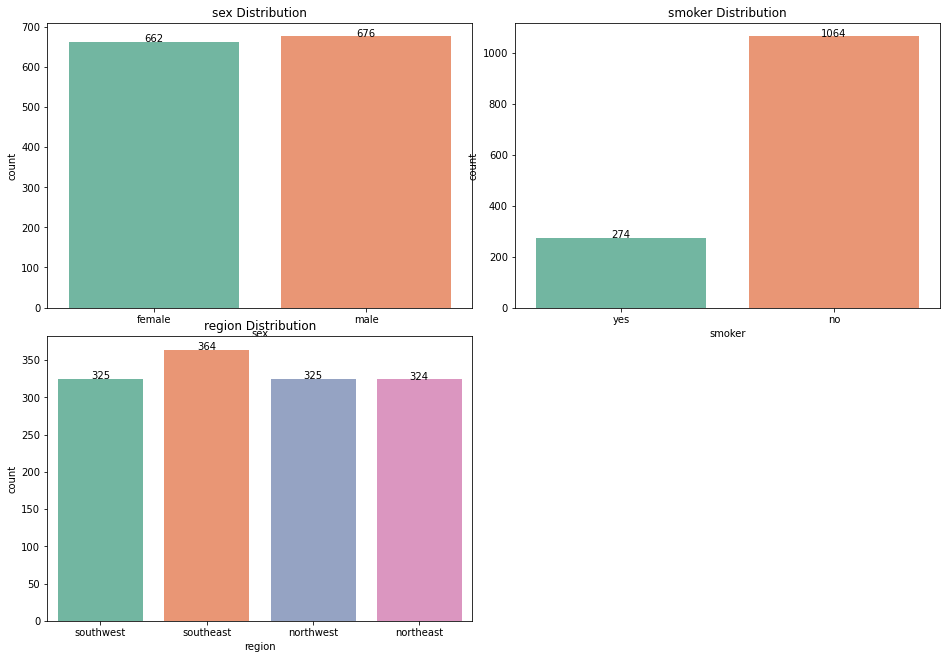

In [12]:
# Count distribution along with values count


sns.set_palette("Set2")

cat = ['sex', 'smoker', 'region']


fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing

for i, category in enumerate(cat):
    row, col = i // 2, i % 2
    ax = sns.countplot(x=category, data=df, ax=axes[row, col])
    ax.set_title(f'{category} Distribution')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Remove the empty plot, if any
if len(cat) < 4:
    fig.delaxes(axes[1, 1])

plt.show()

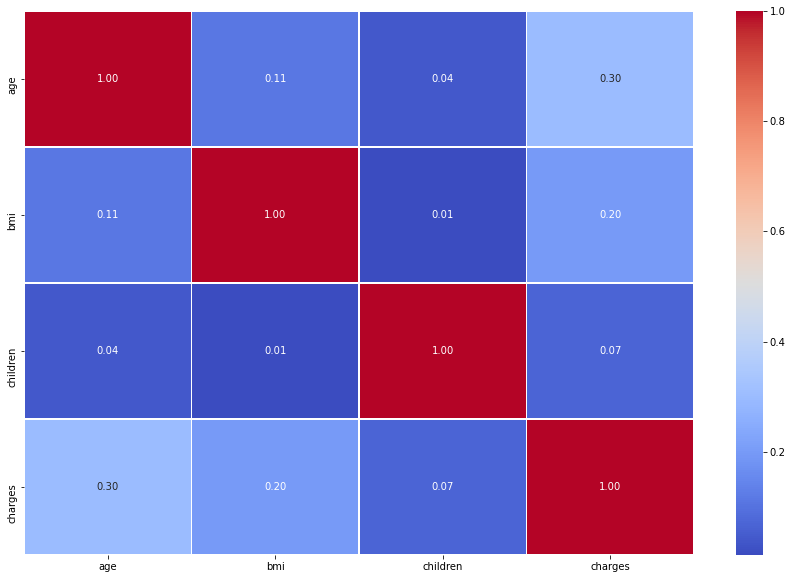

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


## Data Pre-Processing

Working on  Categorial featuers data
* sex :- male:0, female:1
* smoker:- yes:0, no:1
* region:- southeast:0, southwest:1,northeast:2, northwest:3

In [14]:
# Mapping for sex
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Mapping for smoker
df['smoker'] = df['smoker'].map({'yes': 0, 'no': 1})

# Mapping for region
region_mapping = {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}
df['region'] = df['region'].map(region_mapping)


In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [16]:
# Splitting the feathers into X and Charges into y
X = df.drop(columns= 'charges', axis=1)
y = df['charges']

In [17]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting Training and Testing Data


In [19]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### With the given continuous  data since we are  predicting numerical outcomes based on input features,  we will go through the regression models

In [21]:
# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
svm_regressor = SVR()

# Create a dictionary to store model results
results = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}

# Fit and evaluate each model
models = [linear_reg, random_forest, svm_regressor]
model_names = ['Linear Regression', 'Random Forest', 'SVM']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['R2'].append(r2)

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Print the results as a table
print(results_df)


               Model          MAE           MSE        R2
0  Linear Regression  4190.220190  3.368562e+07  0.783022
1      Random Forest  2511.318526  2.129021e+07  0.862864
2                SVM  8592.584330  1.664734e+08 -0.072301


### R2 is an indication of how will a model can predict. But in some cases a better model may have low R2 score.
### So we will plot and see which is better on overall data
### From the above results Linear Regression and Random Forest are way to go models

### Linear Regression 

In [22]:
# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

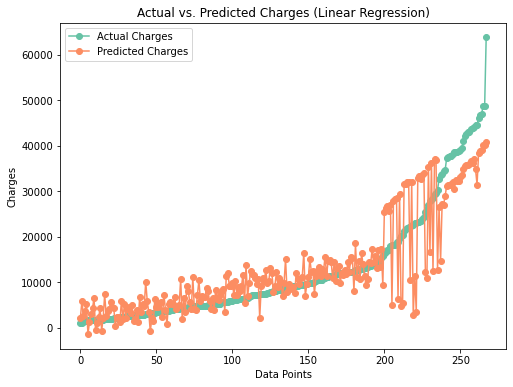

In [23]:
# Sort the actual and predicted values based on actual values
sorted_indices = y_test.argsort()
y_test_sorted_lr = y_test.iloc[sorted_indices]
y_pred_sorted_lr = y_pred[sorted_indices]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_sorted_lr)), y_test_sorted_lr, label="Actual Charges", marker='o')
plt.plot(range(len(y_pred_sorted_lr)), y_pred_sorted_lr, label="Predicted Charges", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.legend()
plt.show()

### Random Forest Regressor

In [24]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)


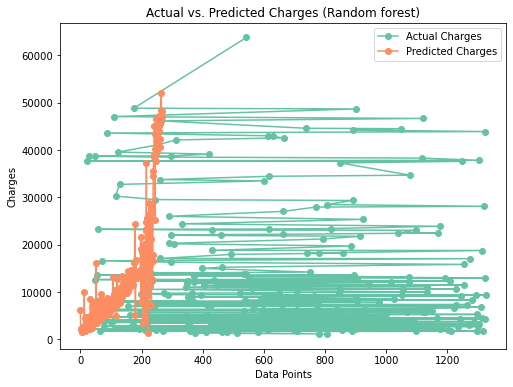

In [25]:
sorted_indices = np.argsort(y_test)
y_test_sorted_rf = y_test.iloc[sorted_indices]
y_pred_sorted_rf = y_pred[sorted_indices]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(y_test_sorted_rf, label="Actual Charges", marker='o')
plt.plot(y_pred_sorted_rf, label="Predicted Charges", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges (Random forest)")
plt.legend()
plt.show()


### Support Vector Machine (SVM) Regressor

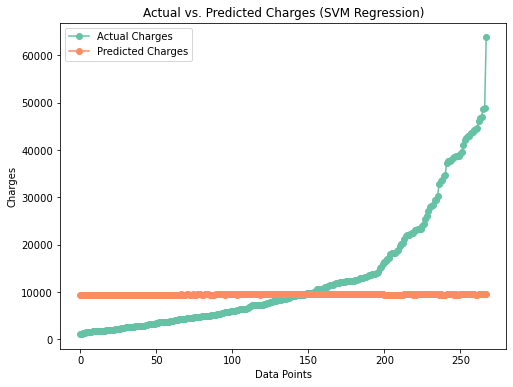

In [26]:
# Initialize and train the Support Vector Machine (SVM) Regressor
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_regressor.predict(X_test)

# Sort the actual and predicted values based on actual values
sorted_indices = np.argsort(y_test)
y_test_svm_sorted = y_test.iloc[sorted_indices]
y_pred_svm_sorted = y_pred_svm[sorted_indices]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_svm_sorted)), y_test_svm_sorted, label="Actual Charges", marker='o')
plt.plot(range(len(y_pred_svm_sorted)), y_pred_svm_sorted, label="Predicted Charges", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges (SVM Regression)")
plt.legend()
plt.show()

### Also based on graphs its clear that Linear Regression gives the best predected outcome on overall data. 

In [27]:
# Compute the R-squared value (coefficient of determination) on the train data
r_sq_train = linear_reg.score(X_train, y_train)
r_sq_train

0.7413131194887537

In [28]:
# Compute the R-squared value (coefficient of determination) on the test data
r_sq_test = linear_reg.score(X_test, y_test)
r_sq_test

0.783021587162344

### * R2 score of 0.783 for the test data implies  that this model explains approximately 78.3% of the variance in the test set. This is a good R2 score, indicating that the model fits the test data relatively well.

### * Similarly for train data set an R2 score of 0.741.

In [29]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model (without regularization)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Initialize and train a Lasso Regression model (L1 regularization)
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Initialize and train a Ridge Regression model (L2 regularization)
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("MSE (Linear Regression):", mse_linear)
print("MSE (Lasso Regression):", mse_lasso)
print("MSE (Ridge Regression):", mse_ridge)

MSE (Linear Regression): 33685623.35414443
MSE (Lasso Regression): 33690488.064017564
MSE (Ridge Regression): 33730428.950244345


### As we can see that the Mean Squared Error (MSE) values for Linear Regression, Lasso Regression (L1 regularization), and Ridge Regression (L2 regularization) are all relatively close. 

### So regularization may not significantly impact the model's performance on this particular dataset.

### Prediction System.

In [30]:
import pickle
# Specify the file path for the Pickle file
pickle_file_path = "linear_regression_model.pkl"

# Save the Linear Regression model to the Pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(linear_reg, file)

In [31]:
#Input data for prediction
data1 = [(28, 0, 33.00, 3, 1, 0)]

# Make predictions on the input data
predicted_charges = linear_reg.predict(data1)

# Output the predicted charges
print("Predicted Charges:", predicted_charges[0])

Predicted Charges: 6930.6582735666125


In [32]:
data2= [(31,1,25.74,0,1,0)]

charge_predic= linear_reg.predict(data2)
charge_predic[0]

4016.992669987316